Dataset & Description

https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

Data Set Information:

Mammography is the most effective method for breast cancer screening
available today. However, the low positive predictive value of breast
biopsy resulting from mammogram interpretation leads to approximately
70% unnecessary biopsies with benign outcomes. To reduce the high
number of unnecessary breast biopsies, several computer-aided diagnosis
(CAD) systems have been proposed in the last years.These systems
help physicians in their decision to perform a breast biopsy on a suspicious
lesion seen in a mammogram or to perform a short term follow-up
examination instead.
This data set can be used to predict the severity (benign or malignant)
of a mammographic mass lesion from BI-RADS attributes and the patient's age.
It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
together with the ground truth (the severity field) for 516 benign and
445 malignant masses that have been identified on full field digital mammograms
collected at the Institute of Radiology of the
University Erlangen-Nuremberg between 2003 and 2006.
Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
to 5 (highly suggestive of malignancy) assigned in a double-review process by
physicians. Assuming that all cases with BI-RADS assessments greater or equal
a given value (varying from 1 to 5), are malignant and the other cases benign,
sensitivities and associated specificities can be calculated. These can be an
indication of how well a CAD system performs compared to the radiologists.

Class Distribution: benign: 516; malignant: 445

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [108]:
df = pd.read_csv('/content/Cleaned_data.csv')
df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
825,4,47,2,1,3,0
826,4,56,4,5,3,1
827,4,64,4,5,3,0
828,5,66,4,5,3,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BI-RADS   830 non-null    int64
 1   Age       830 non-null    int64
 2   Shape     830 non-null    int64
 3   Margin    830 non-null    int64
 4   Density   830 non-null    int64
 5   Severity  830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


In [110]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [111]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [112]:
df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
825,4,47,2,1,3,0
826,4,56,4,5,3,1
827,4,64,4,5,3,0
828,5,66,4,5,3,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


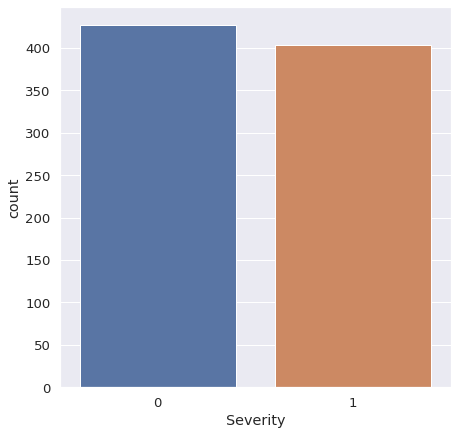

In [113]:
sns.countplot(df['Severity'],label="Count")

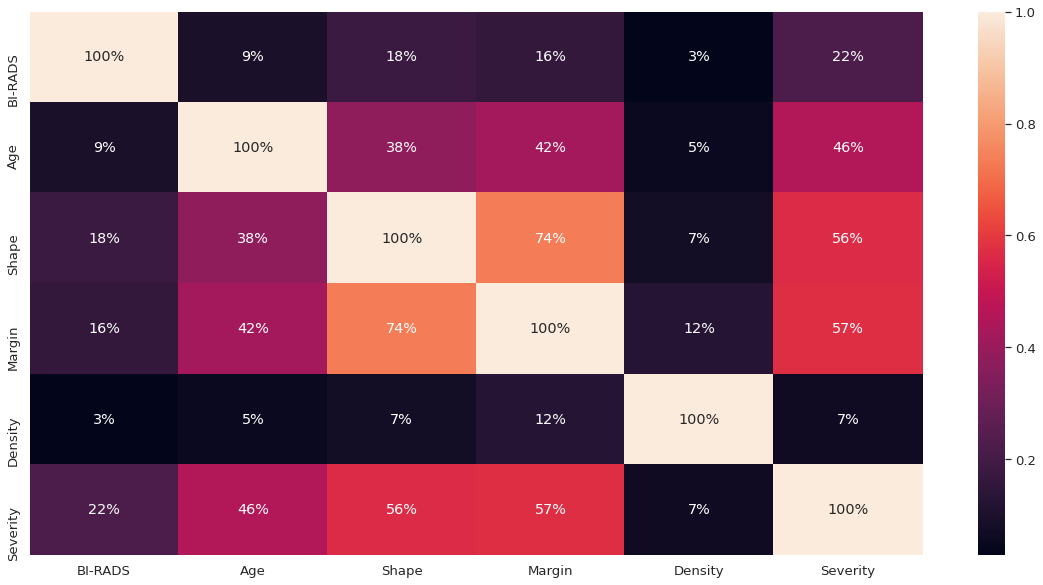

In [114]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [115]:
x = df[['BI-RADS', 'Age', 'Shape', 'Margin', 'Density']]
y = df['Severity']

In [116]:
x


,BI-RADS,Age,Shape,Margin,Density
0,5,67,3,5,3
1,5,58,4,5,3
2,4,28,1,1,3
3,5,57,1,5,3
4,5,76,1,4,3
...,...,...,...,...,...
825,4,47,2,1,3
826,4,56,4,5,3
827,4,64,4,5,3
828,5,66,4,5,3


In [117]:
y

0      1
1      1
2      0
3      1
4      1
      ..
825    0
826    1
827    0
828    1
829    0
Name: Severity, Length: 830, dtype: int64

In [118]:
x.shape

(830, 5)

In [119]:
y.shape

(830,)

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

In [122]:
x_train.shape

(747, 5)

In [123]:
x_test.shape

(83, 5)

In [124]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [126]:
x.shape

(830, 5)

In [127]:
x.shape[1]

5

In [128]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               1536      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [130]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=60)

In [132]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp, es], batch_size=256, validation_split=0.1)

Epoch 1/500
3/3 [==============================] - 0s 54ms/step - loss: 0.6776 - accuracy: 0.5923 - val_loss: 0.6354 - val_accuracy: 0.8133
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.6260 - accuracy: 0.7247 - val_loss: 0.5836 - val_accuracy: 0.8000
Epoch 3/500
3/3 [==============================] - 0s 15ms/step - loss: 0.5772 - accuracy: 0.7679 - val_loss: 0.5367 - val_accuracy: 0.8000
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 0.5349 - accuracy: 0.7946 - val_loss: 0.4972 - val_accuracy: 0.8000
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.4978 - accuracy: 0.7887 - val_loss: 0.4686 - val_accuracy: 0.8000
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 0.4788 - accuracy: 0.8110 - val_loss: 0.4545 - val_accuracy: 0.7867
Epoch 7/500
3/3 [==============================] - 0s 22ms/step - loss: 0.4808 - accuracy: 0.8065 - val_loss: 0.4498 - val_accuracy: 0.7867
Epoch 8/500
3/3 [===

Testing & evaluating the mode

In [133]:
y_pred = model.predict(x_test)
y_pred

array([[0.11096612],
       [0.11069876],
       [0.8566793 ],
       [0.00656644],
       [0.04553995],
       [0.94043124],
       [0.61247885],
       [0.02257511],
       [0.00622672],
       [0.47863844],
       [0.596556  ],
       [0.9404985 ],
       [0.8653641 ],
       [0.67421466],
       [0.92958486],
       [0.05765083],
       [0.900281  ],
       [0.00760162],
       [0.13017654],
       [0.9061758 ],
       [0.5357559 ],
       [0.95320743],
       [0.73355955],
       [0.0082939 ],
       [0.91844296],
       [0.29382882],
       [0.09312573],
       [0.9177077 ],
       [0.2544862 ],
       [0.66925794],
       [0.04553995],
       [0.9662131 ],
       [0.29741246],
       [0.9843815 ],
       [0.11751342],
       [0.9633956 ],
       [0.6331063 ],
       [0.53288776],
       [0.8620689 ],
       [0.09883529],
       [0.3812394 ],
       [0.7235216 ],
       [0.10193837],
       [0.97270423],
       [0.00507292],
       [0.06046927],
       [0.49861392],
       [0.007

In [134]:
y_pred = model.predict_classes(x_test)
y_pred

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dty

In [135]:
y_test

608    0
457    0
290    0
558    0
168    0
      ..
33     0
31     0
810    0
535    1
616    0
Name: Severity, Length: 83, dtype: int64

In [136]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8072


[0.44122976064682007, 0.8072289228439331]

In [137]:
model.predict(x_test)[60]

array([0.5593985], dtype=float32)

In [138]:
model.predict_classes(x_test)[60]

array([1], dtype=int32)

In [139]:
model.predict(x_test)[20]

array([0.5357559], dtype=float32)

In [140]:
model.predict_classes(x_test)[20]

array([1], dtype=int32)

In [141]:
model.predict(sc.transform([[5, 36, 5, 3, 1]]))

array([[0.99147344]], dtype=float32)

In [142]:
model.predict_classes(sc.transform([[5, 36, 5, 3, 1]]))

array([[1]], dtype=int32)

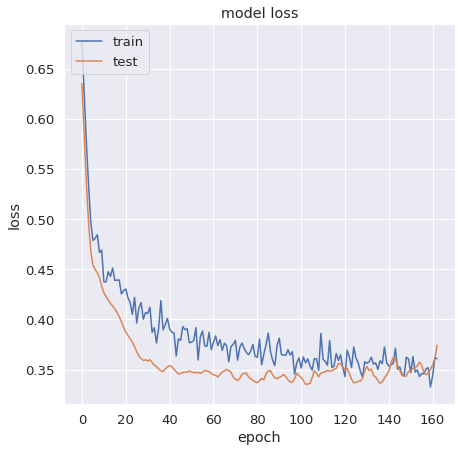

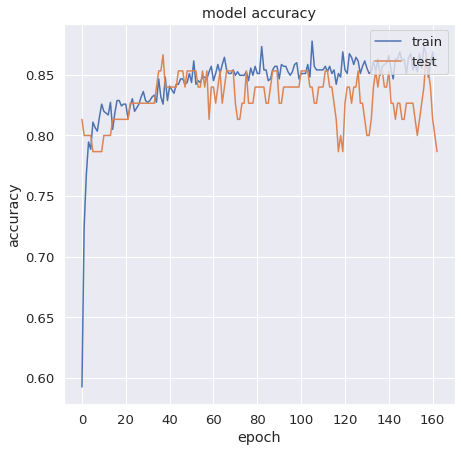

In [143]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Saving the model

In [144]:
model.save('model.h5')

In [145]:
import joblib

In [146]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

Loding Model

In [147]:
sc = joblib.load('scaler.pkl')

In [148]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.predict_classes(sc.transform([[5, 36, 5, 3, 1]]))

array([[1]], dtype=int32)